In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('../proposals_preprocess_0812.xlsx')

# 1. Intro: Simple Statistics of Proposal Dataset

- Total rows: 20918
- Columns

In [2]:
df.shape, df.columns

((20918, 37),
 Index(['id', 'end', 'app', 'ipfs', 'type', 'body', 'link', 'title', 'start',
        'state', 'votes', 'author', 'symbol', 'quorum', 'scores', 'created',
        'updated', 'network', 'plugins', 'choices', 'privacy', 'flagged',
        'snapshot', 'strategies', 'validation', 'discussion', 'quorumType',
        '__typename', 'scores_state', 'scores_total', 'scores_updated',
        'scores_by_strategy', 'space_id', 'lang', 'Class A', 'Class B',
        'Class C'],
       dtype='object'))

### Columns Containing NaN Values

In [3]:
for c in df.columns[:-3]:
    x = df[c].isna().sum()
    if x > 0:
        print(c, x)

app 8767
title 6
symbol 5037
updated 20731
privacy 20287
discussion 13466
scores_state 9


### Columns That Are Nearly Empty

In [4]:
for c in ["plugins", "validation", "quorum"]:
    temp = df[c].value_counts() 
    print(c, temp.index[0], temp[0])
    print()

plugins {} 20596

validation {'params': {}} 20601

quorum 0.0 16085



### Sample data

In [5]:
df.iloc[100]

id                       QmRzgJ9aVQ8xRjduZJiXUiuVjFCNGmYkpksrr1oJDsbhW6
end                                                 2020-09-24 21:00:00
app                                                                 NaN
ipfs                     QmRzgJ9aVQ8xRjduZJiXUiuVjFCNGmYkpksrr1oJDsbhW6
type                                                      single-choice
body                  I would like to propose the immortalization of...
link                  https://snapshot.org/#/aavegotchi.eth/proposal...
title                                    Immortalize Community Champion
start                                               2020-09-17 11:40:00
state                                                            closed
votes                                                                14
author                       0xDA5b2cd0d0Bb26E79FB3210233dDABdB7de131C9
symbol                                                              NaN
quorum                                                          

In [6]:
df.head()

,id,end,app,ipfs,type,body,link,title,start,state,...,__typename,scores_state,scores_total,scores_updated,scores_by_strategy,space_id,lang,Class A,Class B,Class C
0,QmSXpyHBrkjzjmGpdYxKvYoRAMvdJNp7rrnyvJqTdtpayZ,2020-07-20 01:00:00,NaN,QmSXpyHBrkjzjmGpdYxKvYoRAMvdJNp7rrnyvJqTdtpayZ,single-choice,Read the formatted version of this proposal at...,https://snapshot.org/#/balancer.eth/proposal/Q...,balFactor: incentivizing BAL liquidity on Bala...,2020-07-19 01:00:00,closed,...,Proposal,final,301890.797262,1636666475,"[[297407.78291458864, 4306.498731651296, 0], [...",balancer.eth,en,NaN,NaN,NaN
1,QmXYVj4GBu16GfuTLouxQSvbB8w3G2EAvYq9TAxX38ruKb,2020-07-20 01:00:00,NaN,QmXYVj4GBu16GfuTLouxQSvbB8w3G2EAvYq9TAxX38ruKb,single-choice,Read the formatted version of this proposal at...,https://snapshot.org/#/balancer.eth/proposal/Q...,Modifying feeFactor: toward reducing the minin...,2020-07-19 01:00:00,closed,...,Proposal,final,250818.946655,1636666543,"[[247042.11576416524, 3767.59570725957, 0], [9...",balancer.eth,en,NaN,NaN,NaN
2,QmboDWvsXYXPZb44arPVoMa3LHuv74YsGZ3cSoG6uj4oZe,2020-07-20 01:00:00,NaN,QmboDWvsXYXPZb44arPVoMa3LHuv74YsGZ3cSoG6uj4oZe,single-choice,Read the formatted version of this proposal at...,https://snapshot.org/#/balancer.eth/proposal/Q...,Modifying wrapFactor: applying a 0.7 factor to...,2020-07-19 01:00:00,closed,...,Proposal,final,296856.624307,1636666548,"[[281362.73565358046, 3153.664203614811, 0], [...",balancer.eth,en,NaN,NaN,NaN
3,QmeWmvdFCTq5tnFHqgFmAVJDCccTYjg1zWb9cfUByg7zbz,2020-07-29 01:00:00,NaN,QmeWmvdFCTq5tnFHqgFmAVJDCccTYjg1zWb9cfUByg7zbz,single-choice,[This proposal is also on Balancer's forum.](\...,https://snapshot.org/#/balancer.eth/proposal/Q...,First batch of grants from Balancer Ecosystem ...,2020-07-28 01:00:00,closed,...,Proposal,final,129011.648708,1636666857,"[[70361.16645469955, 58640.079706512006, 0], [...",balancer.eth,en,NaN,NaN,NaN
4,QmUadcUgd3jAhJbofgrnKNMfeuGFvMmybhCkttW4gGfYYJ,2020-08-03 01:00:00,NaN,QmUadcUgd3jAhJbofgrnKNMfeuGFvMmybhCkttW4gGfYYJ,single-choice,[This proposal has been posted by user 5325235...,https://snapshot.org/#/balancer.eth/proposal/Q...,Modifying wrapFactor: applying a 0.2 factor to...,2020-08-02 01:00:00,closed,...,Proposal,final,349071.151033,1636666863,"[[180634.79301153703, 147781.31511566267, 0], ...",balancer.eth,en,NaN,NaN,NaN


### Columns with Nearly Identical Values

In [7]:
for c in ["quorumType", "scores_state", "__typename", "state", "lang", "privacy"]:
    print(df[c].value_counts())
    print()

# 단, privacy는 대부분 null 

default    20918
Name: quorumType, dtype: int64

final    20909
Name: scores_state, dtype: int64

Proposal    20918
Name: __typename, dtype: int64

closed    20918
Name: state, dtype: int64

en    20918
Name: lang, dtype: int64

shutter    631
Name: privacy, dtype: int64



### Count of Each Value in the Specified Column

In [8]:
df["author"].value_counts()

0x5E23D08324f017d5425e59A2782C9ae27aCE0958    1269
0xBB7B59Afa3A0E5Be143b8fE9C641F00c1ecB9d69    1082
0x724061efDFef4a421e8be05133ad24922D07b5Bf     322
0xc3d6f21c79C2567A1858d8b93a4EDBD9dB399d9d     315
0xFAD69Bd739c64cC8e3f1C3bb3B60fe4f160174Cc     294
                                              ... 
0xFf918a3Ff6CCc3722197B555a7a30de9A37906dB       1
0x01DF0F4fcc595fdDab5F084E9a6118d75a894050       1
0x6210477B3025BF5ea50A35D39e7D2875dC11661c       1
0x853AebEc29B1DABA31de05aD58738Ed1507D3b82       1
0xA11DA8B2D9A7883eb636d7de426025e5fD9fda1A       1
Name: author, Length: 3421, dtype: int64

In [9]:
df["author"].value_counts().describe()

count    3421.000000
mean        6.114586
std        33.200820
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      1269.000000
Name: author, dtype: float64

In [10]:
df["scores"].value_counts()

[0, 0]                                    28
[12, 0]                                   13
[1090149.7629480332, 0, 2000342.6]        12
[12, 0, 0]                                12
[895035.2139744707, 0, 2000342.6]         11
                                          ..
[1167167.2142442812, 0, 0]                 1
[63.25911802403418, 173395.8274078204]     1
[1545895.425194297, 35757.66917005914]     1
[11585557.50133734, 0]                     1
[28154353.961499177, 2173.91304347826]     1
Name: scores, Length: 20522, dtype: int64

In [11]:
df["network"].value_counts()

1        16023
56        2357
137        902
42161      577
250        275
1088       245
1284       204
100        102
43114       79
592         50
2400        47
10          34
321         17
324          3
4            2
8453         1
Name: network, dtype: int64

In [12]:
df["choices"].str.lower().value_counts()

['for', 'against', 'abstain']                                                                                                                                             3073
['yes', 'no']                                                                                                                                                             3035
['for', 'against']                                                                                                                                                        1649
['yes', 'no', 'abstain']                                                                                                                                                  1247
['yae', 'nay', 'abstain']                                                                                                                                                  403
                                                                                                                             

In [13]:
df["strategies"].value_counts()

[{'network': '56', 'params': {'symbol': 'CAKE', 'address': '0x0E09FaBB73Bd3Ade0a17ECC321fD13a19e81cE82', 'decimals': 18}}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [14]:
df["scores_total"].value_counts()

1.200000e+01    51
1.300000e+01    46
1.100000e+01    43
1.000000e+01    42
1.400000e+01    42
                ..
5.474768e+06     1
1.287215e+05     1
1.405948e+05     1
2.500000e+02     1
2.815653e+07     1
Name: scores_total, Length: 19191, dtype: int64

In [15]:
df["scores_by_strategy"].value_counts()

[[0], [0]]                                                                                                                                                                                                     28
[[12], [0]]                                                                                                                                                                                                    13
[[761588.5729547191, 328561.1899933141], [0, 0], [2000099.23, 243.37]]                                                                                                                                         12
[[12], [0], [0]]                                                                                                                                                                                               12
[[780331.6535529103, 114703.56042156044], [0, 0], [2000099.23, 243.37]]                                                                                         

# 2. Proposal Counts for Each Space

### Proposal Counts for Each Space
- Total count
- Mean
- Standard Deviation
- Percentile

In [16]:
space_counts = df['space_id'].value_counts()
space_counts.describe()

count     245.000000
mean       85.379592
std       198.386212
min         1.000000
25%        22.000000
50%        39.000000
75%        78.000000
max      2351.000000
Name: space_id, dtype: float64

In [17]:
print("Spaces under 5 proposals:", space_counts[space_counts <= 5].shape)

print("Spaces under 10 proposals:", space_counts[space_counts <= 10].shape)
space_counts[space_counts <= 10]

Spaces under 5 proposals: (21,)
Spaces under 10 proposals: (28,)


poktdao.eth               10
primexyz.eth               9
concentratordao.eth        9
infinex.eth                8
pnounsdao.eth              7
paragonsdao.eth            7
btcismylove.eth            7
goopsnapshot.eth           5
web3-no1.eth               4
digitalriyal.eth           3
rusha.eth                  3
babyfive.eth               3
meiridi.eth                3
dorg.eth                   3
insuretoken.eth            2
thehong.eth                2
fabien.eth                 2
xxx.freesubs.eth           1
defjnite.eth               1
haitang.eth                1
01meta.eth                 1
cuchorapido.eth            1
biteren.eth                1
apollodao.eth              1
pozoaxel.eth               1
lens.changliuchuan.eth     1
kwenta.eth                 1
signinhere.eth             1
Name: space_id, dtype: int64

In [18]:
temp = space_counts[space_counts <= 2].index.tolist()

print("Spaces under 2 proposals:", len(temp))

df[df["space_id"].isin(temp)][["title", "body", "space_id"]].sort_values(by="space_id")

Spaces under 2 proposals: 14


,title,body,space_id
14775,Proposal - Make Polygon a Country,If no one is saying I got a Proposal For you: ...,01meta.eth
3016,Partnership & Mutual Grant with Gitcoin,Developer DAOs mission is to accelerate the ed...,apollodao.eth
14367,FROGAGA Lucky Box Airdrops,Upcoming trending NFT series! #FROGAGA Lucky B...,biteren.eth
14539,Propuesta para sueldo retroactivo de Stovedove,"User: Stovedove\nCantidad: 150,000\n75%: 112,5...",cuchorapido.eth
15028,Have you already done Tabi?,"According to developers, the funds will be pri...",defjnite.eth
1603,This is a long title this is a long title this...,This is a long title this is a long title this...,fabien.eth
4899,Snapshot Hackathon #1,Weight rank the projects you like\n*\n# Treasu...,fabien.eth
14997,[Phase 2] HIP-54: Airdrop to Democratic Heroes,Modify the term of office of the elected Missi...,haitang.eth
2467,[Transitioning to Contribution Phase],[Different Phases]:\ninSure DeFi has been crea...,insuretoken.eth
14549,Community Growth Incentive Programs - Reimburs...,In order to drive the natural growth of our co...,insuretoken.eth


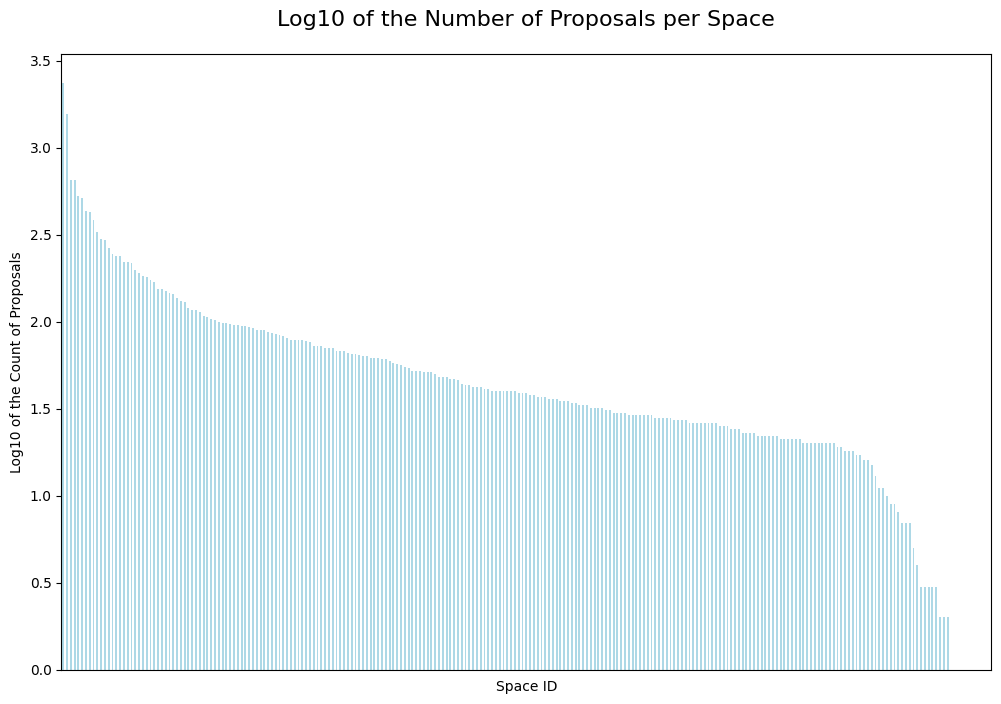

In [19]:
log_space_counts = np.log10(space_counts)

plt.figure(figsize=(12, 8))
log_space_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Space ID')
plt.ylabel('Log10 of the Count of Proposals')
plt.title('Log10 of the Number of Proposals per Space',
          pad=20, fontsize=16)
plt.xticks([], [])  # Remove x-axis ticks
plt.show()

### Number of Followers, Proposals, and Votes for Each Space 
- Proposal count and vote count in this section are the number ***before preprocessing deletion***

(245, 47)


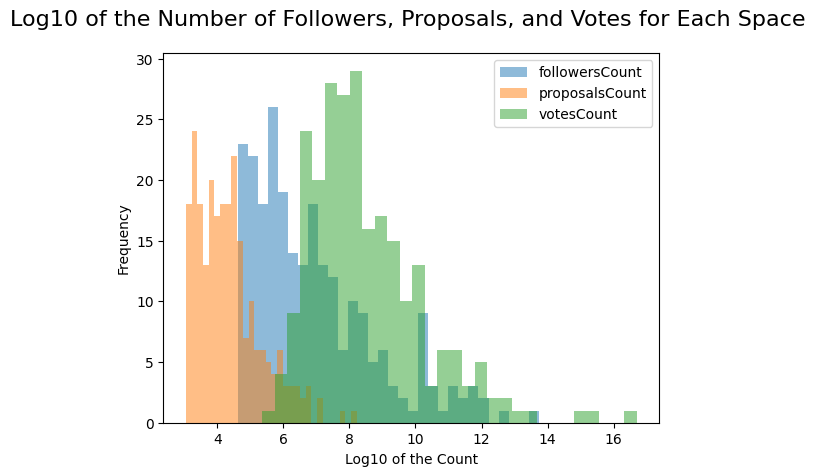

In [20]:
df_space = pd.read_excel('../spaces_cut.xlsx')
df_space = df_space[df_space['id'].isin(space_counts.index)]
print(df_space.shape)

plt.hist(df_space['followersCount'].apply(np.log), label="followersCount", alpha=0.5, bins=30)
plt.hist(df_space['proposalsCount'].apply(np.log), label="proposalsCount", alpha=0.5, bins=30)
plt.hist(df_space['votesCount'].apply(np.log), label="votesCount", alpha=0.5, bins=30)
plt.xlabel('Log10 of the Count')
plt.ylabel('Frequency')
plt.title('Log10 of the Number of Followers, Proposals, and Votes for Each Space ',
          pad=20, fontsize=16)
plt.legend()

In [21]:
df_space[['followersCount', 'proposalsCount', 'votesCount']].describe()

,followersCount,proposalsCount,votesCount
count,245.000000,245.000000,2.450000e+02
mean,12399.938776,152.853061,1.293534e+05
std,65209.787856,333.606993,1.209157e+06
min,102.000000,21.000000,2.130000e+02
25%,243.000000,36.000000,1.501000e+03
50%,652.000000,66.000000,3.471000e+03
75%,2797.000000,119.000000,1.224000e+04
max,917335.000000,3725.000000,1.794336e+07


# 3. Total votes by spaces

### Aggregate Vote Counts per Space

In [22]:
space_votes = df.groupby('space_id')['votes'].sum()
space_votes.describe() / 100 # divide by 100 due to the large numbers

count         2.450000
mean       1263.504939
std       11998.070901
min           0.120000
25%           8.470000
50%          27.100000
75%         110.720000
max      177959.240000
Name: votes, dtype: float64

In [23]:
space_votes.sort_values(ascending=False).head(10)

space_id
stgdao.eth                17795924
arbitrumfoundation.eth     5289055
aave.eth                   3105225
cakevote.eth                434550
aavegotchi.eth              396624
gmx.eth                     305324
uniswapgovernance.eth       275334
metislayer2.eth             242695
speraxdao.eth               213315
gitcoindao.eth              180367
Name: votes, dtype: int64

### Rankings: Top 5 and Bottom 5 by Total Votes

In [24]:
space_votes_rank = space_votes.rank(method='first', ascending=False).astype(int).sort_values(ascending=True)
print("<Top 5>")
print(space_votes_rank[:5])
print()
print("<Bottom 5>")
print(space_votes_rank[-5:])

<Top 5>
space_id
stgdao.eth                1
arbitrumfoundation.eth    2
aave.eth                  3
cakevote.eth              4
aavegotchi.eth            5
Name: votes, dtype: int32

<Bottom 5>
space_id
insuretoken.eth     241
thehong.eth         242
xxx.freesubs.eth    243
haitang.eth         244
01meta.eth          245
Name: votes, dtype: int32


# 4. Proposal Dates

### Number of Proposals per Month - ["start", "end", "created"]
- start: proposal start date
- end: proposal end date
- created: proposal created date

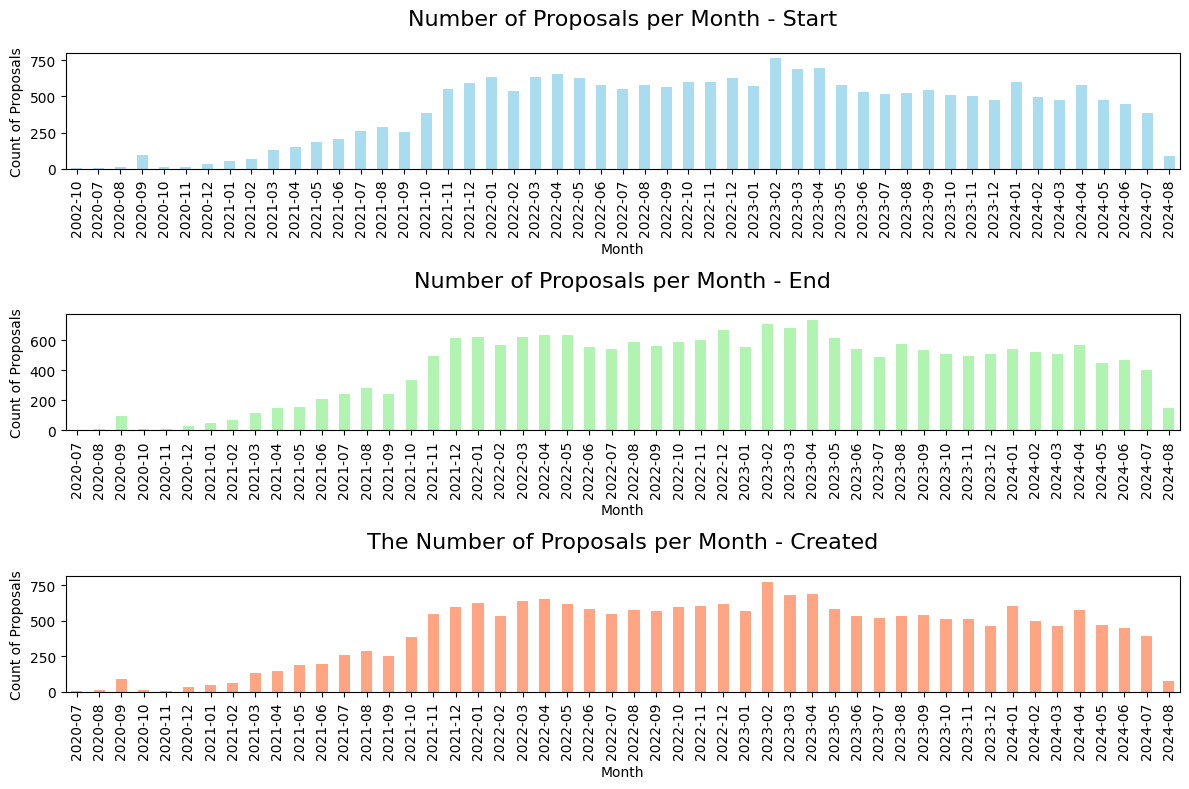

In [25]:
# First, convert the 'start' column to datetime if it's not already
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])
df['created'] = pd.to_datetime(df['created'])

# Extract the month and year from the 'start' column
df['year_month_start'] = df['start'].dt.to_period('M')
df['year_month_end'] = df['end'].dt.to_period('M')
df['year_month_created'] = df['created'].dt.to_period('M')

# Now count the number of occurrences per month
monthly_counts_start = df['year_month_start'].value_counts().sort_index()
monthly_counts_end = df['year_month_end'].value_counts().sort_index()
monthly_counts_created = df['year_month_created'].value_counts().sort_index()

# Plotting the histogram with less crowded x-axis labels
plt.figure(figsize=(12, 8))

# First subplot for 'start'
plt.subplot(3, 1, 1)
monthly_counts_start.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Count of Proposals')
plt.title('Number of Proposals per Month - Start', pad=20, fontsize=16)

# Second subplot for 'end'
plt.subplot(3, 1, 2)
monthly_counts_end.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Count of Proposals')
plt.title('Number of Proposals per Month - End', pad=20, fontsize=16)

# Third subplot for 'created'
plt.subplot(3, 1, 3)
monthly_counts_created.plot(kind='bar', color='coral', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Count of Proposals')
plt.title('The Number of Proposals per Month - Created', pad=20, fontsize=16)

plt.tight_layout()
plt.show()

### Duration of Proposal 
- Unit: Hour

In [26]:
# Calculate the duration for each proposal
df['duration'] = (df['end'] - df['start']).dt.total_seconds() / 3600  # Convert to hours
df["duration"].describe()

count     20918.000000
mean        186.032557
std        1361.365462
min           0.359722
25%          72.000000
50%          96.920556
75%         168.000000
max      176653.250000
Name: duration, dtype: float64

Remove the top and bottom 5% of the duration values

In [27]:
top = df["duration"].quantile(0.95)
bottom = df["duration"].quantile(0.05)
simple_duration = df[(df["duration"] > bottom) & (df["duration"] < top)]["duration"]
simple_duration.describe()

count    18321.000000
mean       112.858122
std         52.572517
min         37.498611
25%         72.000000
50%         96.000000
75%        167.971389
max        335.995833
Name: duration, dtype: float64

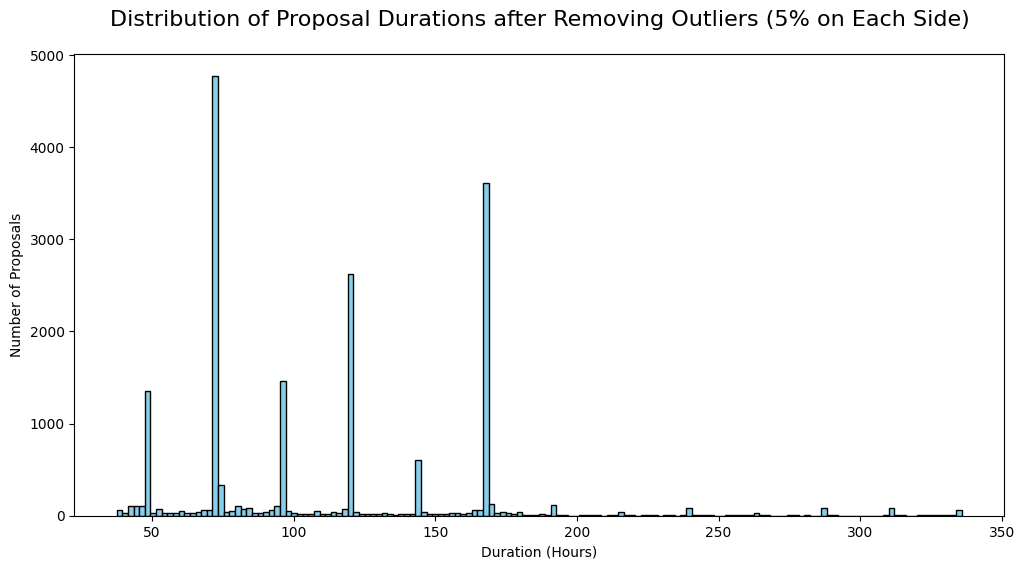

In [28]:
plt.figure(figsize=(12, 6))
plt.hist(simple_duration, bins=150, color='skyblue', edgecolor='black',)
plt.xlabel('Duration (Hours)')
plt.ylabel('Number of Proposals')
plt.title('Distribution of Proposal Durations after Removing Outliers (5% on Each Side)',
            pad=20, fontsize=16)
plt.show()